In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential

In [3]:
co_variance = pd.read_csv(r'C:\Users\Shrinidhi\Desktop\Thesis\fpkm_top_3000_cv_genes.tsv', sep='\t', index_col=0)

# Create the model
model = Sequential()

X = co_variance.drop(columns=['cancer_status']).values

# Convert 'cancer_status' to binary labels 
y = co_variance['cancer_status'].apply(lambda x: 1 if x == 'cancer' else 0).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [4]:
print(co_variance.shape)  
print("Shape of X_train:", X_train.shape)  
print("Shape of X_test:", X_test.shape)    

print("Unique labels in y_train:", np.unique(y_train))  
print("Class distribution in y_train:", np.bincount(y_train))  #class balance

(19131, 3001)
Shape of X_train: (15304, 3000)
Shape of X_test: (3827, 3000)
Unique labels in y_train: [0 1]
Class distribution in y_train: [7681 7623]


In [5]:

from keras.optimizers import Adam

from keras.callbacks import EarlyStopping

model = Sequential()

# Architecture
model.add(Dense(500, input_dim=3000, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))

# Output layer 
model.add(Dense(1, activation='sigmoid'))

# Compilation
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train
history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, callbacks=[early_stopping])

# Eval (testing)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

Epoch 1/100
123/123 [==============================] - 3s 17ms/step - loss: 0.5584 - accuracy: 0.8112 - val_loss: 0.0955 - val_accuracy: 0.9556
Epoch 2/100
123/123 [==============================] - 2s 15ms/step - loss: 0.1259 - accuracy: 0.9618 - val_loss: 0.0780 - val_accuracy: 0.9807
Epoch 3/100
123/123 [==============================] - 2s 16ms/step - loss: 0.1313 - accuracy: 0.9699 - val_loss: 0.0743 - val_accuracy: 0.9713
Epoch 4/100
123/123 [==============================] - 2s 16ms/step - loss: 0.1390 - accuracy: 0.9648 - val_loss: 0.0589 - val_accuracy: 0.9804
Epoch 5/100
123/123 [==============================] - 2s 16ms/step - loss: 0.0912 - accuracy: 0.9754 - val_loss: 0.0628 - val_accuracy: 0.9824
Epoch 6/100
123/123 [==============================] - 2s 16ms/step - loss: 0.0702 - accuracy: 0.9811 - val_loss: 0.0682 - val_accuracy: 0.9837
Epoch 7/100
123/123 [==============================] - 2s 16ms/step - loss: 0.1263 - accuracy: 0.9779 - val_loss: 0.0583 - val_accuracy:

In [6]:


loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Binary predictions

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

120/120 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9901
Test Accuracy: 0.9900705218315125
120/120 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1921
           1       0.98      1.00      0.99      1906

    accuracy                           0.99      3827
   macro avg       0.99      0.99      0.99      3827
weighted avg       0.99      0.99      0.99      3827

[[1891   30]
 [   8 1898]]


In [7]:
# Training acc
train_accuracy = history.history['accuracy'][-1]  # Accuracy at Last epoch
print(f"Final Training Accuracy: {train_accuracy}")

Final Training Accuracy: 0.9951809048652649


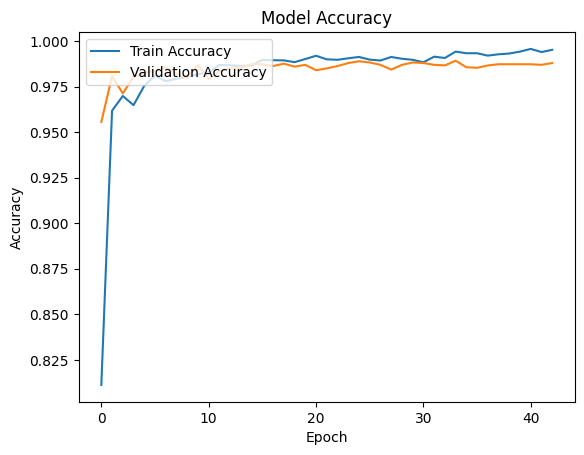

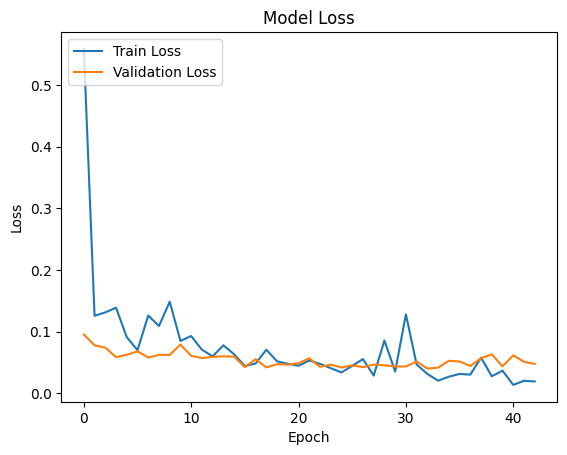

In [8]:
import matplotlib.pyplot as plt

# Plot accuracy 
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1921
           1       0.98      1.00      0.99      1906

    accuracy                           0.99      3827
   macro avg       0.99      0.99      0.99      3827
weighted avg       0.99      0.99      0.99      3827



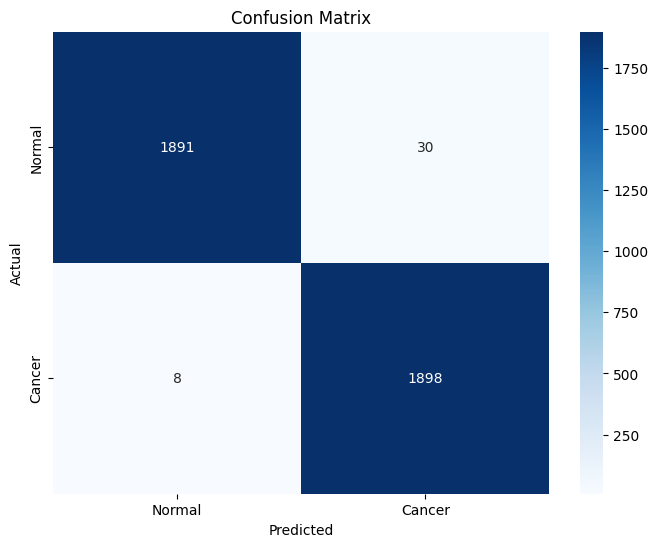

120/120 [==============================] - 0s 2ms/step


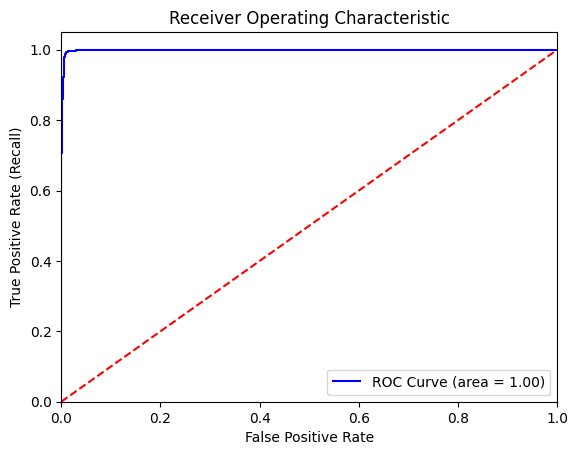

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# y_test are the true labels and y_pred are the predicted labels

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Cancer'], yticklabels=['Normal', 'Cancer'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
y_pred_proba = model.predict(X_test).ravel()  # Positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


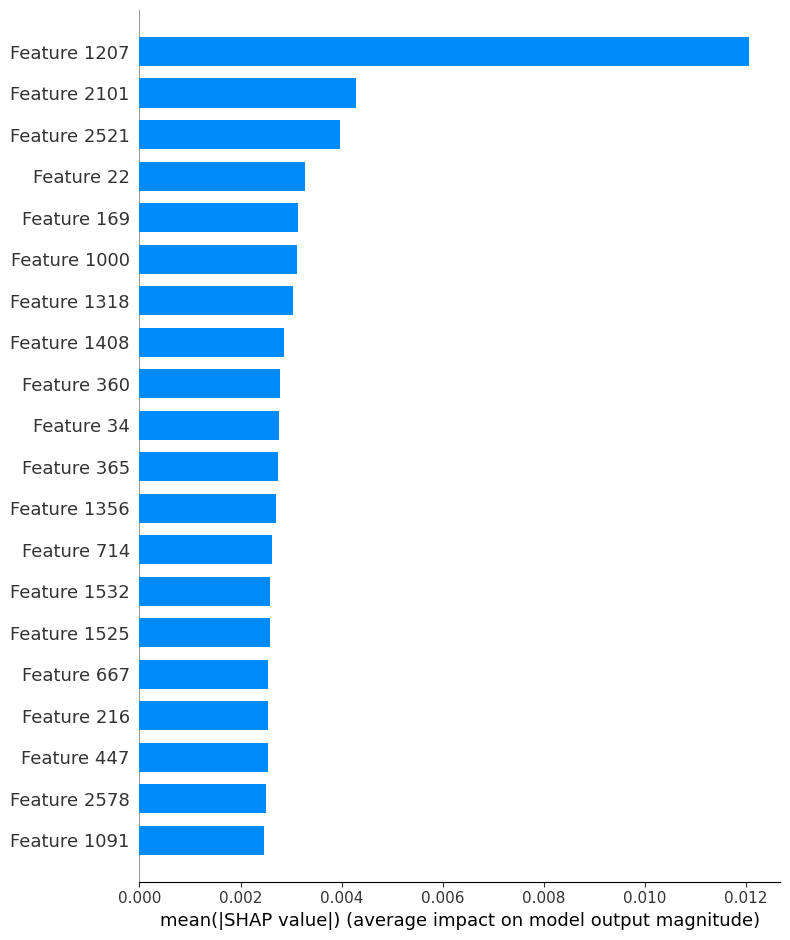

In [10]:
import numpy as np
import shap

batch_size = 500
num_samples = X_test.shape[0]
all_shap_values = []

# Loop through data in batches
for start in range(0, num_samples, batch_size):
    end = min(start + batch_size, num_samples)
    X_batch = X_test[start:end]
    
    # Initialize SHAP 
    explainer = shap.DeepExplainer(model, X_batch)
    shap_values_batch = explainer.shap_values(X_batch)
    
    
    if isinstance(shap_values_batch, list):
        shap_values_batch = shap_values_batch[0]  
    
    all_shap_values.append(shap_values_batch)

#Concat
shap_values_full = np.concatenate(all_shap_values, axis=0)
shap.summary_plot(shap_values_full, X_test, plot_type="bar")


Top 10 most important genes based on SHAP values:
['ENSG00000219928.2', 'ENSG00000147889.16', 'ENSG00000099953.9', 'ENSG00000137673.8', 'ENSG00000244306.9', 'ENSG00000213886.3', 'ENSG00000064205.10', 'ENSG00000095970.16', 'ENSG00000247627.2', 'ENSG00000115138.10']


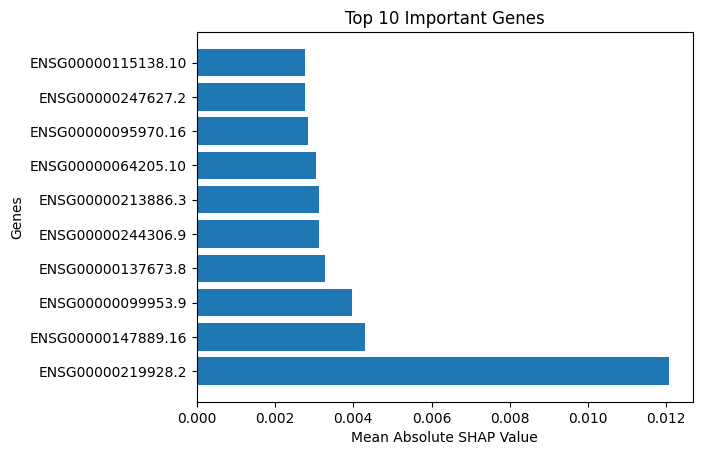

In [11]:
import numpy as np
import shap
import matplotlib.pyplot as plt


feature_names = co_variance.drop(columns=['cancer_status']).columns  

# dict to store shap values and genes
shap_gene_mapping = {}

# Loop through the SHAP values and map them to gene names
for i, feature_name in enumerate(feature_names):
    shap_gene_mapping[feature_name] = shap_values_full[:, i]

# sort genes by their mean absolute SHAP value 
mean_abs_shap = np.abs(shap_values_full).mean(axis=0)
sorted_genes = np.argsort(mean_abs_shap)[::-1]  


top_10_genes = [feature_names[i] for i in sorted_genes[:10]]
print("Top 10 most important genes based on SHAP values:")
print(top_10_genes)

#plot
plt.barh(top_10_genes, mean_abs_shap[sorted_genes[:10]])
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Genes')
plt.title('Top 10 Important Genes')
plt.show()


In [12]:
import pandas as pd
import numpy as np
genes = co_variance.drop(columns=['cancer_status']).columns

#calculate the mean absolute SHAP value
shap_importance = np.mean(np.abs(shap_values_full), axis=0)

#sort
top_n_genes_indices = np.argsort(shap_importance)[::-1]  


top_n_genes = genes[top_n_genes_indices][:10] 


print("Top 10 genes based on SHAP importance:")
for i, gene in enumerate(top_n_genes):
    print(f"{i+1}. {gene}, SHAP Importance: {shap_importance[top_n_genes_indices[i]]}")

#cancer status
top_genes_data = co_variance[top_n_genes]
cancer_status = co_variance['cancer_status']

#concat
top_genes_with_status = pd.concat([top_genes_data, cancer_status], axis=1)
print("\nTop genes with cancer status:")
print(top_genes_with_status.head())


Top 10 genes based on SHAP importance:
1. ENSG00000219928.2, SHAP Importance: 0.012074362275432494
2. ENSG00000147889.16, SHAP Importance: 0.004295489040982034
3. ENSG00000099953.9, SHAP Importance: 0.003971127581698309
4. ENSG00000137673.8, SHAP Importance: 0.003280523365786879
5. ENSG00000244306.9, SHAP Importance: 0.0031333879316302582
6. ENSG00000213886.3, SHAP Importance: 0.003121604390231993
7. ENSG00000064205.10, SHAP Importance: 0.003046864846771221
8. ENSG00000095970.16, SHAP Importance: 0.002853486449604869
9. ENSG00000247627.2, SHAP Importance: 0.0027750894544045406
10. ENSG00000115138.10, SHAP Importance: 0.002767180975639011

Top genes with cancer status:
                         ENSG00000219928.2  ENSG00000147889.16  \
GTEX-S4Q7-0003-SM-3NM8M             2.5462              2.9784   
TCGA-19-1787-01                    -0.2845              7.8311   
TCGA-S9-A7J2-01                     7.4066              3.3535   
GTEX-QV31-1626-SM-2S1QC            -9.9658             -0.3

In [13]:
import pandas as pd
import numpy as np
genes = co_variance.drop(columns=['cancer_status']).columns

#calculate the mean absolute SHAP value
shap_importance = np.mean(np.abs(shap_values_full), axis=0)

#sort
top_n_genes_indices = np.argsort(shap_importance)[::-1]  


top_n_genes = genes[top_n_genes_indices][:100] 


print("Top 10 genes based on SHAP importance:")
for i, gene in enumerate(top_n_genes):
    print(f"{i+1}. {gene}, SHAP Importance: {shap_importance[top_n_genes_indices[i]]}")

#cancer status
top_genes_data = co_variance[top_n_genes]
cancer_status = co_variance['cancer_status']

#concat
top_genes_with_status = pd.concat([top_genes_data, cancer_status], axis=1)
print("\nTop genes with cancer status:")
print(top_genes_with_status.head())

Top 10 genes based on SHAP importance:
1. ENSG00000219928.2, SHAP Importance: 0.012074362275432494
2. ENSG00000147889.16, SHAP Importance: 0.004295489040982034
3. ENSG00000099953.9, SHAP Importance: 0.003971127581698309
4. ENSG00000137673.8, SHAP Importance: 0.003280523365786879
5. ENSG00000244306.9, SHAP Importance: 0.0031333879316302582
6. ENSG00000213886.3, SHAP Importance: 0.003121604390231993
7. ENSG00000064205.10, SHAP Importance: 0.003046864846771221
8. ENSG00000095970.16, SHAP Importance: 0.002853486449604869
9. ENSG00000247627.2, SHAP Importance: 0.0027750894544045406
10. ENSG00000115138.10, SHAP Importance: 0.002767180975639011
11. ENSG00000257270.1, SHAP Importance: 0.002737497526017611
12. ENSG00000196616.12, SHAP Importance: 0.002693383032112637
13. ENSG00000224916.8, SHAP Importance: 0.0026147293700052704
14. ENSG00000100985.7, SHAP Importance: 0.002583509927894549
15. ENSG00000133800.8, SHAP Importance: 0.0025773526725066456
16. ENSG00000206195.10, SHAP Importance: 0.002

In [14]:
top_genes_with_status.to_csv("C://Users//Shrinidhi//Desktop//Thesis//Top 100 genes//DNN//top_100_genes_SHAP_cv.csv", index=False)


In [15]:
import torch
import torch.nn as nn
import tensorflow as tf
import numpy as np

# Convert Keras model to PyTorch
class PyTorchModel(nn.Module):
    def __init__(self, keras_model):
        super(PyTorchModel, self).__init__()
        self.layers = []
        for layer in keras_model.layers:
            if isinstance(layer, tf.keras.layers.Dense):
                self.layers.append(nn.Linear(layer.input_shape[1], layer.units))
        self.model = nn.Sequential(*self.layers)

    def forward(self, x):
        return self.model(x)

torch_model = PyTorchModel(model)
torch_model.eval()

PyTorchModel(
  (model): Sequential(
    (0): Linear(in_features=3000, out_features=500, bias=True)
    (1): Linear(in_features=500, out_features=500, bias=True)
    (2): Linear(in_features=500, out_features=200, bias=True)
    (3): Linear(in_features=200, out_features=300, bias=True)
    (4): Linear(in_features=300, out_features=200, bias=True)
    (5): Linear(in_features=200, out_features=100, bias=True)
    (6): Linear(in_features=100, out_features=1, bias=True)
  )
)

Input Tensor 0 did not already require gradients, required_grads has been set automatically.
Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished


Top 10 most important genes based on DeepLIFT values:
1: ENSG00000219928.2 (Mean Absolute DeepLIFT: 0.0053)
2: ENSG00000162366.7 (Mean Absolute DeepLIFT: 0.0040)
3: ENSG00000211751.7 (Mean Absolute DeepLIFT: 0.0037)
4: ENSG00000175063.16 (Mean Absolute DeepLIFT: 0.0034)
5: ENSG00000239951.1 (Mean Absolute DeepLIFT: 0.0034)
6: ENSG00000116132.11 (Mean Absolute DeepLIFT: 0.0033)
7: ENSG00000184292.6 (Mean Absolute DeepLIFT: 0.0033)
8: ENSG00000247627.2 (Mean Absolute DeepLIFT: 0.0033)
9: ENSG00000189334.8 (Mean Absolute DeepLIFT: 0.0030)
10: ENSG00000121068.13 (Mean Absolute DeepLIFT: 0.0029)


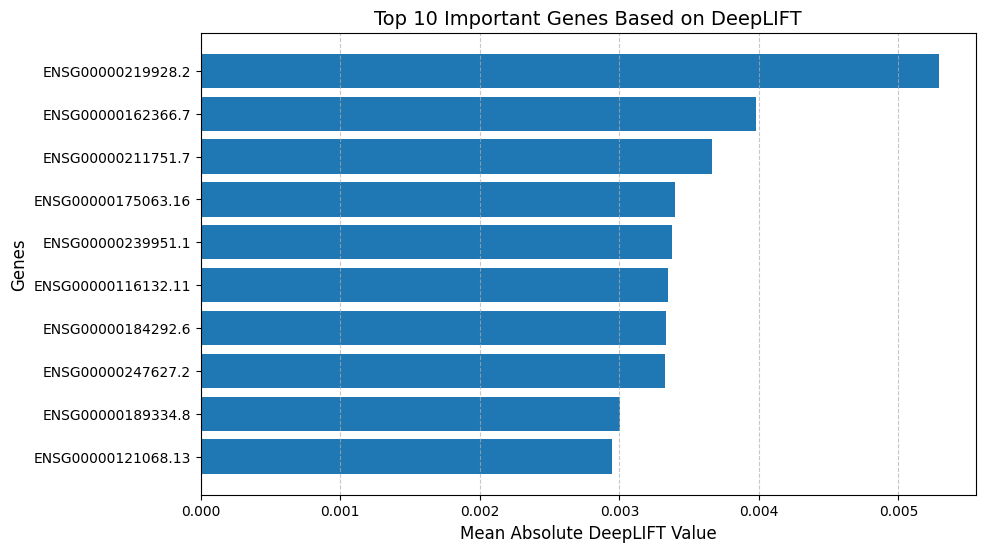

In [16]:
from captum.attr import DeepLift
from captum.attr import visualization as viz
import matplotlib.pyplot as plt

# test set to tensor
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
deeplift = DeepLift(torch_model)
attributions = deeplift.attribute(X_test_torch, baselines=torch.zeros_like(X_test_torch))
attributions_np = attributions.detach().numpy()
feature_names = co_variance.drop(columns=['cancer_status']).columns

# Compute mean absolute DeepLIFT
mean_abs_deeplift = np.abs(attributions_np).mean(axis=0)

#sort
sorted_indices = np.argsort(mean_abs_deeplift)[::-1]
top_10_genes = [feature_names[i] for i in sorted_indices[:10]]

print("Top 10 most important genes based on DeepLIFT values:")
for i, gene in enumerate(top_10_genes, 1):
    print(f"{i}: {gene} (Mean Absolute DeepLIFT: {mean_abs_deeplift[sorted_indices[i-1]]:.4f})")
plt.figure(figsize=(10, 6))
plt.barh(top_10_genes[::-1], mean_abs_deeplift[sorted_indices[:10]][::-1])
plt.xlabel('Mean Absolute DeepLIFT Value', fontsize=12)
plt.ylabel('Genes', fontsize=12)
plt.title('Top 10 Important Genes Based on DeepLIFT', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [17]:
# Extract top 100 genes
top_100_genes = [feature_names[i] for i in sorted_indices[:100]]

print("\nTop 100 Most Important Genes Based on DeepLIFT Values:")
for i, gene in enumerate(top_100_genes, 1):
    print(f"{i}: {gene} (Mean Absolute DeepLIFT: {mean_abs_deeplift[sorted_indices[i-1]]:.4f})")

# Optional: Save to a file
top_100_df = pd.DataFrame({
    "Gene": top_100_genes,
    "Mean Absolute DeepLIFT": mean_abs_deeplift[sorted_indices[:100]]
})


Top 100 Most Important Genes Based on DeepLIFT Values:
1: ENSG00000219928.2 (Mean Absolute DeepLIFT: 0.0053)
2: ENSG00000162366.7 (Mean Absolute DeepLIFT: 0.0040)
3: ENSG00000211751.7 (Mean Absolute DeepLIFT: 0.0037)
4: ENSG00000175063.16 (Mean Absolute DeepLIFT: 0.0034)
5: ENSG00000239951.1 (Mean Absolute DeepLIFT: 0.0034)
6: ENSG00000116132.11 (Mean Absolute DeepLIFT: 0.0033)
7: ENSG00000184292.6 (Mean Absolute DeepLIFT: 0.0033)
8: ENSG00000247627.2 (Mean Absolute DeepLIFT: 0.0033)
9: ENSG00000189334.8 (Mean Absolute DeepLIFT: 0.0030)
10: ENSG00000121068.13 (Mean Absolute DeepLIFT: 0.0029)
11: ENSG00000211644.2 (Mean Absolute DeepLIFT: 0.0029)
12: ENSG00000168502.17 (Mean Absolute DeepLIFT: 0.0028)
13: ENSG00000122756.14 (Mean Absolute DeepLIFT: 0.0028)
14: ENSG00000096696.13 (Mean Absolute DeepLIFT: 0.0028)
15: ENSG00000132465.10 (Mean Absolute DeepLIFT: 0.0028)
16: ENSG00000160862.12 (Mean Absolute DeepLIFT: 0.0028)
17: ENSG00000171346.13 (Mean Absolute DeepLIFT: 0.0027)
18: ENSG0

In [18]:
top_100_df.to_csv("C://Users//Shrinidhi//Desktop//Thesis//Top 100 genes//DNN//top_100_genes_deeplift_cv.csv", index=False)


In [19]:
import numpy as np
import lime
import lime.lime_tabular
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd


In [20]:

feature_names = co_variance.drop(columns=['cancer_status']).columns.tolist()

# Initialize LIME
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,  
    feature_names=feature_names,
    class_names=["Normal", "Cancer"],  # Labels for binary classification
    mode="classification"
)


In [21]:
def predict_fn(X):
    preds = model.predict(X)  # (N, 1)
    return np.hstack([1 - preds, preds])  # [P(Normal), P(Cancer)]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dict to store LIME genes
lime_scores = {gene: [] for gene in co_variance}

num_samples = len(X_test)  # Use all test samples

for idx in range(num_samples):  
    sample = X_test[idx].reshape(1, -1)  # Get the sample
    explanation = explainer.explain_instance(sample.flatten(), predict_fn, num_features=len(feature_names))  # Consider all genes
    
    # Store feature importance values
    for feature, score in explanation.as_list():
        gene = feature.split()[0]  # Extract gene 
        if gene in lime_scores:  
            lime_scores[gene].append(score)

# Mean importance
lime_avg_scores = {gene: np.mean(scores) for gene, scores in lime_scores.items() if scores}  # ignore empty list

# Visualization
lime_df = pd.DataFrame(list(lime_avg_scores.items()), columns=["Gene", "Mean LIME Score"])
lime_df = lime_df.sort_values(by="Mean LIME Score", ascending=False)

# Top 10
plt.figure(figsize=(10, 6))
plt.barh(lime_df["Gene"].iloc[:10][::-1], lime_df["Mean LIME Score"].iloc[:10][::-1])  
plt.xlabel("Mean LIME Score")
plt.ylabel("Genes")
plt.title("Global Top 10 Important Genes (LIME)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


157/157 [==============================] - 0s 3ms/step


In [ ]:
# Print top 100 most important genes
top_100_genes = lime_df.head(100)
print("\nTop 100 Most Important Genes Based on LIME:")
print(top_100_genes)



Top 100 Most Important Genes Based on LIME:
                    Gene  Mean LIME Score
1088   ENSG00000267125.2         0.007960
447   ENSG00000104413.15         0.006429
216    ENSG00000260570.1         0.005444
2578   ENSG00000235363.1         0.005164
2753   ENSG00000236439.4         0.005153
...                  ...              ...
2248   ENSG00000205364.3         0.001362
510    ENSG00000250299.5         0.001359
1187  ENSG00000153563.15         0.001349
1547  ENSG00000151090.17         0.001348
1860   ENSG00000244682.7         0.001347

[100 rows x 2 columns]


In [ ]:
top_100_genes.to_csv("C://Users//Shrinidhi//Desktop//Thesis//Top 100 genes//DNN//top_100_genes_lime_cv.csv", index=False)

Top 100 genes saved to 'top_100_genes_lime.csv'.
